In [3]:
import pandas as pd
import numpy as np
import seaborn as sns#for plot
import matplotlib.pyplot as plt#for plot
get_ipython().run_line_magic('matplotlib','inline')#to get image in jupyter

In [4]:
from sklearn.svm import SVC
from sklearn import datasets

In [5]:
iris=datasets.load_iris()

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
X=iris["data"][:,(2,3)]#for simplication we just use petal lenght and peadal width
Y=iris["target"]

In [9]:
#to chk whether it is setosa or versicolor ie we are going to convert this multiclassification into binary classification
setosa_or_versicolor=(Y==0)|(Y==1)
X=X[setosa_or_versicolor]
Y=Y[setosa_or_versicolor]

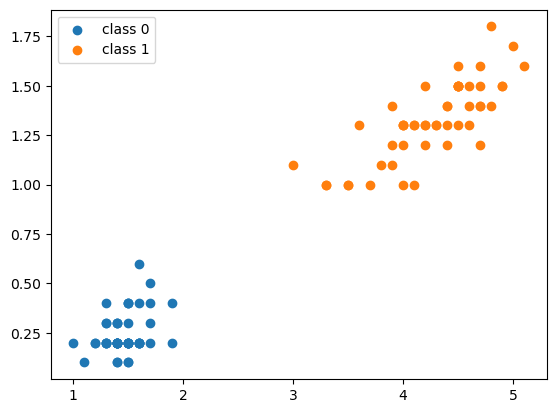

In [10]:
#create scatter,to look our dataset(how our dataset looks like)
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],label="class 0")
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],label="class 1")
plt.legend()
plt.show()

In [11]:
#above is classic example for hyperlane(we see that class 1 and class 0 are in completed in differenr position)
#now our datapoints are ready
#now we need to split and draw the hyperplane line,which is equi-distantance between support vector

In [12]:
#SVM classifier model
#iniatise the model
svm_clf=SVC(kernel="linear")#C-->hard classifier(we need strong line)
#svm_clf=SVC(Kernel="linear",C=float("inf"))-->this code raises error so ,i removed C

In [13]:
#to fit

svm_clf.fit(X,Y)

SVC(kernel='linear')

In [14]:
#calculate the weight terms
svm_clf.coef_

array([[1.1, 0.7]])

In [15]:
#intercept(bias)
svm_clf.intercept_

array([-3.27999997])

In [16]:
#the line we draw c is -3.27,and w1=1.1,w2=0.7

In [17]:
#to get better visualiztion
def plot_svc_decision_boundary(svm_clf,xmin,xmax):#it take svm model and xmax and xmin
    w=svm_clf.coef_[0]
    b=svm_clf.intercept_[0]
    
    #at decsion boundary-->we need extra points w0*x0 +  w1*x1 +b =0
    #-->x1= -w1/w0 + x0 -b/w1
    x0=np.linspace(xmin,xmax,200)
    decision_boundary=-w[0]/w[1] * x0 -b/w[1]
    #x0 and decision_boundary will pair the inpu and output
    
    
    margin= 1/w[1]#margin is distance between hyperplane and support vector,margin is property
    gutter_up=decision_boundary + margin
    gutter_down=decision_boundary - margin
    #gutter_up-->one line above  hyperplane where support vector lies ,and,gutter_down->below the  hyperplane
    
    
    #defining where the support vector lies
    svs=svm_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1],s=100,facecolors="#FFAAAA",label="support vector")#hightlight the support vector
    plt.plot(x0,decision_boundary,"k-",linewidth=2,label="Hyperplane")
    plt.plot(x0,gutter_up,"k--",linewidth=2)
    plt.plot(x0,gutter_down,"k--",linewidth=2)
    plt.legend()#show the label

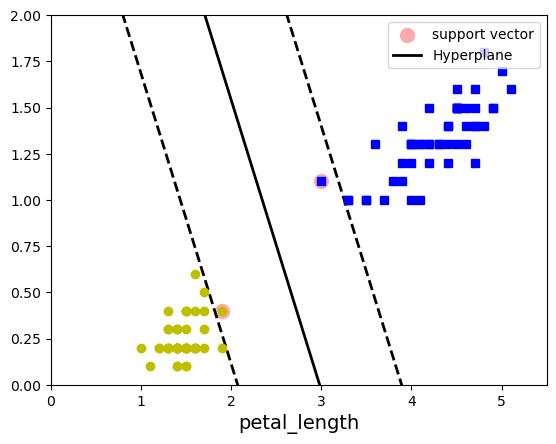

In [18]:
#call the function
plot_svc_decision_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][Y==1],X[:,1][Y==1],"bs")
plt.plot(X[:,0][Y==0],X[:,1][Y==0],"yo")
plt.xlabel("petal_length",fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()

In [19]:
#solid line-->hyperplane
#hightlighted points-->support vector
#dottedl line-->gutter up,gutter down

In [20]:
#to see where the support vectors are present
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [21]:
#why scaling is important
#very important in SVM -->we need to scale the data
#lets see differece between scaled and unscaled data

(0.0, 6.0, 0.0, 90.0)

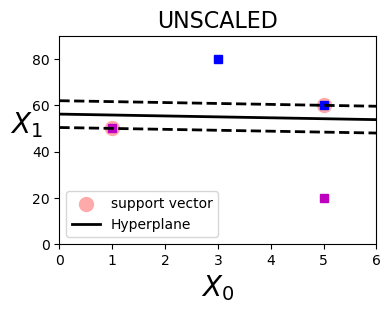

In [22]:
Xs=np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
Ys=np.array([0,0,1,1])
svm_clf=SVC(kernel="linear",C=100)
svm_clf.fit(Xs,Ys)


plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:,0][Ys==1],Xs[:,1][Ys==1],"bs")
plt.plot(Xs[:,0][Ys==0],Xs[:,1][Ys==0],"ms")
plot_svc_decision_boundary(svm_clf,0,6)
plt.xlabel("$X_0$",fontsize=20)
plt.ylabel("$X_1$",fontsize=20,rotation=0)
plt.title("UNSCALED",fontsize=16)
plt.axis([0,6,0,90])

(-2.0, 2.0, -2.0, 2.0)

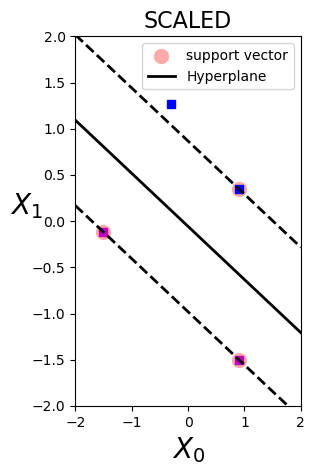

In [23]:
 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(Xs)
svm_clf.fit(X_scaled,Ys)


plt.subplot(121)
plt.plot(X_scaled[:,0][Ys==1],X_scaled[:,1][Ys==1],"bs")
plt.plot(X_scaled[:,0][Ys==0],X_scaled[:,1][Ys==0],"ms")
plot_svc_decision_boundary(svm_clf,-2,2)
plt.xlabel("$X_0$",fontsize=20)
plt.ylabel("$X_1$",fontsize=20,rotation=0)
plt.title("SCALED",fontsize=16)
plt.axis([-2,2,-2,2])



In [24]:
#in unscale it is difficult seperate the data points

# NON LINEAR CLASSFIER

In [ ]:
#here we use make_moons dataset from sklearn

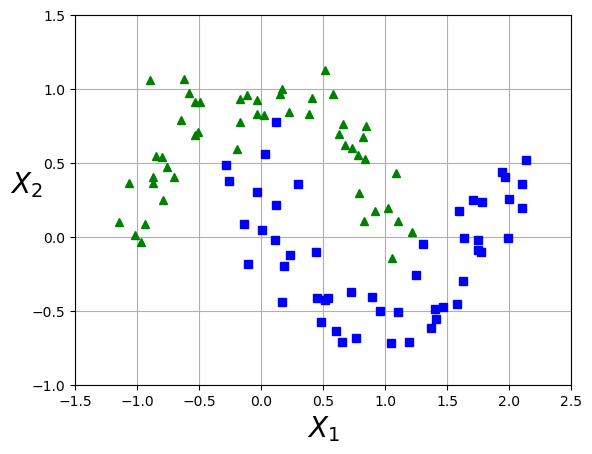

In [26]:
#NON Linear classifier
from sklearn.datasets import make_moons
X,Y=make_moons(n_samples=100,noise=0.15,random_state=60)


def plot_dataset(X,Y,axes):
    plt.plot(X[:,0][Y==1],X[:,1][Y==1],"bs")
    plt.plot(X[:,0][Y==0],X[:,1][Y==0],"g^")
    plt.axis(axes)
    plt.grid(True,which="both")
    plt.xlabel(r"$X_1$",fontsize=20)
    plt.ylabel(r"$X_2$",fontsize=20,rotation=0)
plot_dataset(X,Y,[-1.5,2.5,-1,1.5])
plt.show()

In [32]:
#whereever we draw the straight line,we cannot split the data in a effective manner
#so ,inorder overcome this we use svm model,we use POLYNOMINL KERNEL
#Using POLYNOMIAL KERNEL we create POLYNOMIAL REGRESSION or i can draw a line to separate data
#lets see how it works
#some random data
#Xs=np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
#Ys=np.array([0,0,1,1])
#from sklearn.pipeline import Pipeline
#this pipeline will take care of standard scaler as well as kernel
#svm_pipe=Pipeline([("scaler",StandardScaler()),                ("svm_clf_pipe",SVC(kernel="linear",C=100))])

#note:above one is not neccessary

# POLNOMIAL FEATURES


In [40]:
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [41]:
#generating polynomial features from my data
X=np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [42]:
pf=PolynomialFeatures(degree=2)

In [43]:
#performing fit and tranforming
pf.fit_transform(X)#first is bias term,remaining columns are weight term(X  ,X**2)as degree of 2

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [47]:
#again modifying my existing data
pf=PolynomialFeatures(degree=3)
pf.fit_transform(X)


array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [ ]:
#bring back my non linear classifier data

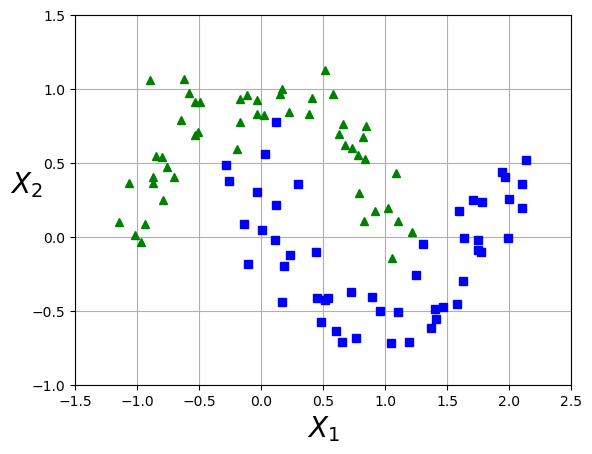

In [48]:
from sklearn.datasets import make_moons
X,Y=make_moons(n_samples=100,noise=0.15,random_state=60)


def plot_dataset(X,Y,axes):
    plt.plot(X[:,0][Y==1],X[:,1][Y==1],"bs")
    plt.plot(X[:,0][Y==0],X[:,1][Y==0],"g^")
    plt.axis(axes)
    plt.grid(True,which="both")
    plt.xlabel(r"$X_1$",fontsize=20)
    plt.ylabel(r"$X_2$",fontsize=20,rotation=0)
plot_dataset(X,Y,[-1.5,2.5,-1,1.5])
plt.show()

In [62]:
#now we are going to tranform it with the help of polynomial features,use standard scler,send it thru polynomialclassifier

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [53]:
polynomial_svm_clf=Pipeline([("Poly_features",PolynomialFeatures(degree=3)),
                            ("Scaler",StandardScaler()),
                            ("svm_clf",LinearSVC(C=10,loss="hinge",random_state=42))])

In [55]:
polynomial_svm_clf.fit(X,Y)

D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('Poly_features', PolynomialFeatures(degree=3)),
                ('Scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

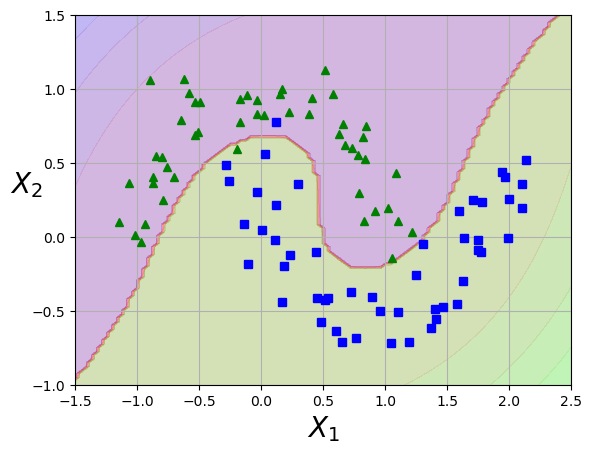

In [60]:
def plot_predictions(clf,axes):
    X0s=np.linspace(axes[0],axes[1],100)
    X1s=np.linspace(axes[2],axes[3],100)
    X0,X1=np.meshgrid(X0s,X1s)
    X=np.c_[X0.ravel(),X1.ravel()]
    Y_pred=clf.predict(X).reshape(X0.shape)
    Y_prediction=clf.decision_function(X).reshape(X0.shape)
    plt.contourf(X0,X1,Y_pred,cmap=plt.cm.brg,alpha=0.2)
    plt.contourf(X0,X1,Y_prediction,cmap=plt.cm.brg,alpha=0.1)
    
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,Y,[-1.5,2.5,-1,1.5])
plt.show()

In [61]:
#so with the help of the polynomial features,that are applied on my linear data,i can increase/decrease by which my model can learn
#so instead of striaght line,my model has ability to learn thes complex representation
#important-->learn pipeline in datascience->this will help us in multiple operation in  single call